# Scipy

- [Linear Equations](#Linear-Equations)
- [Non-linear Equations](#Non-linear-Equations)
- [Integration - Single](#Integration---Single)
- [Integration - Double](#Integration---Double)
- [Optimisation](#Optimisation)
- [Solve ODE](#Solve-ODE)

## Linear Equations

### Example - Solve Linear System of Equations

- Solve the following system of linear equations:

$$
\begin{align}
    3x_1 + 6x_2 - 4x_3 &= 4 \\
    2x_2 - x_3 &= 1 \\
    x_1 + x_3 &= 0.25 \\
\end{align}
$$

- Rewrite the system of equations in linear algebra form:

$$
\mathbf{A} \cdot \mathbf{x} = \mathbf{b}
$$

$$
\begin{bmatrix}
        3 & 6 & -4 \\
        0 & 2 & -1 \\
        1 & 0 & 1 \\
\end{bmatrix} \cdot \begin{bmatrix}
        x_1\\
        x_2\\
        x_3\\
\end{bmatrix}
 = \begin{bmatrix}
        4\\
        1\\
        0.25\\
\end{bmatrix}
$$

- Module `scipy` $\to$ module `linalg` $\to$ function `solve`
    - `import scipy.linalg as la` $\to$ `la.solve`
    - Solves system of $N\times N$ full rank equations
- Test whether the solution is correct:
    - Matrix multiplication `numpy.dot`

In [ ]:
# Different methods to use the linear algebra solver: 
from scipy.linalg import solve
from scipy import linalg as la
import scipy.linalg as la

#la.solve?
help(la.solve)

In [ ]:
import numpy as np
import scipy.linalg as la

A = np.array([
    [3, 6, -4],
    [0, 2, -1],
    [1, 0,  1]
])
b = np.array([4, 1,0.25])

x = la.solve(A, b)
print("Solution:")
print(x)
print("Residual:")
print(np.dot(A, x)-b)

### Example:


Consider the following system of equations:
$$
\mathbf{A} \cdot \mathbf{x} = \mathbf{b}
$$
Write a function `solve_system(A,b)` that takes in a matrix $\mathbf{A}$ and a vector $\mathbf{b}$ and returns the solution $\mathbf{x}$, the residual 
$$
R = \mathbf{A} \cdot \mathbf{x} - \mathbf{b}
$$
and the determinant of the matrix $\mathbf{A}$ as outputs. Therefore the function should return three outputs. 

Use this function to find the solution, the residual as well as the determinant of the matrix $\mathbf{A}$: 
$$
\begin{bmatrix}
        3 & 6 & -4 & 1 & 4\\
        0 & 2 & -1 & 0 & 2\\
        1 & 0 & 1 & 0 & 0\\
        1 & 0 & 2 & 5 & 1\\        
        0 & 0 & 1 & 1 & 3
\end{bmatrix} \cdot \begin{bmatrix}
        x_1\\
        x_2\\
        x_3\\
        x_4\\  
        x_5\\          
\end{bmatrix}
 = \begin{bmatrix}
        4\\
        1\\
        0.25\\
        5\\        
        6\\                
\end{bmatrix}
$$


In [ ]:
import numpy.linalg as la
la?

In [ ]:
def solve_system(A,b):
    import numpy as np 
    import scipy.linalg as la # np.linalg can also be used.
    
    x = la.solve(A,b)
    
    R = np.dot(A,x) - b
    
    det = la.det(A)
    
    return x,R,det

A = np.array([[3, 6,-4,1,4],[0, 2,-1,0,2],[1, 0,1,0,0],[1, 0,2,5,1],[0, 0,1,1,3]])
b = np.array([4,1,0.25,5,6])

print("\n-----------------A-------------------")
print(A)
print("\n-----------------b-------------------")
print(b)

x,R,det = solve_system(A,b)

print("\n")
print("Solution:",x)
print("\n")
print("Residual:",R)
print("\n")
print("Determinant:",det)
    

### Example - Fitting straight line through data points $\to$ Least Squares

- Consider a straight line $y = mx + c$


- We want to fit it through the following points:
    $$
    \begin{array}{lllll}
        x & y \\ \hline
        0 & 2.1 \\
        1 & 2.5 \\
        2 & 2.9 \\
        3 & 3.6 \\
        4 & 3.9 \\
    \end{array}
    $$


- Which $m$ and $c$ will give the best fit?


**Option 1: Linear regression with `scipy.stats`**

In this example, `scipy.stats` will be used to find the slope $m$ and the intercept $c$ of the straight line.

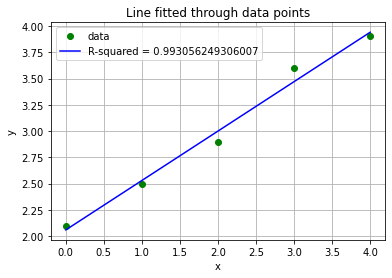

In [1]:
#%reset -f
%matplotlib inline
import scipy.stats as stats
from matplotlib import pyplot as plt
import numpy as np

x_data = [0, 1, 2, 3, 4]
y_data = [2.1, 2.5, 2.9, 3.6, 3.9]

slope, intercept, r_value, p_value, std_err = stats.linregress(x_data,y_data)

plt.figure(1)
plt.plot(x_data,y_data,'go', label='data')
#plt.plot(x,slope*x + intercept,'b',label="R-squared = {}".format(r_value))
plt.plot(np.array(x_data),slope*np.array(x_data) + intercept,'b',label="R-squared = {}".format(r_value))
plt.title('Line fitted through data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [2]:
import scipy.stats as stats
stats.linregress?

Signature: stats.linregress(x, y=None)
Docstring:
Calculate a linear least-squares regression for two sets of measurements.

Parameters
----------
x, y : array_like
    Two sets of measurements.  Both arrays should have the same length.  If
    only `x` is given (and ``y=None``), then it must be a two-dimensional
    array where one dimension has length 2.  The two sets of measurements
    are then found by splitting the array along the length-2 dimension. In
    the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
    equivalent to ``linregress(x[0], x[1])``.

Returns
-------
result : ``LinregressResult`` instance
    The return value is an object with the following attributes:

    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zer

In [ ]:
import scipy.stats as stats
stats.linregress?

### Example: Option 2 - Linear algebra from first principles*

How can we perform the same procedure using linear algebra? 

- Consider a straight line $y = mx+c$ and substitute each point:
    $$
    \begin{align}
        m\times 0 + c &= 2.1\\
        m\times 1 + c &= 2.5\\
        m\times 2 + c &= 2.9\\
        m\times 3 + c &= 3.6\\
        m\times 4 + c &= 3.9\\
    \end{align}$$

- Two unknowns and five equations. Cannot satisfy each equation - minimise error.
    $$
    \begin{bmatrix}
            0 & 1 \\
            1 & 1 \\
            2 & 1 \\
            3 & 1 \\
            4 & 1 \\
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
            m\\
            c\\
    \end{bmatrix}
     = 
    \begin{bmatrix}
            2.1\\
            2.5\\
            2.9\\
            3.6\\
            3.9\\
    \end{bmatrix}
    $$


- Cannot solve
    $$\mathbf{A}\mathbf{x} = \mathbf{b}$$

**Solution:**

- Least squares solution is given by solving for $\mathbf{x}$:
    $$\mathbf{A}^{\textrm{T}}\mathbf{A}\mathbf{x} = \mathbf{A}^{\textrm{T}}\mathbf{b}$$


- Python: Plot data and the least squares line fitted through the data.


- Excel: Plot data and insert linear trend line through the data.


- Compare the coefficients?

**Background:**

- Background on where does least squares come from?


- The error $\mathbf{E} = \mathbf{A}\mathbf{x}-\mathbf{b}$ can be written as the error squares
    $$
    \begin{align}
        \mathbf{E}^{\textrm{T}}\mathbf{E} &=
        \left(
            \mathbf{A}\mathbf{x}-\mathbf{b}
        \right)^{\textrm{T}}
        \left(
            \mathbf{A}\mathbf{x}-\mathbf{b}
        \right) \\ &=
        \mathbf{x}^{\textrm{T}}\mathbf{A}^{
            \textrm{T}}\mathbf{A}\mathbf{x} - 
            2\mathbf{A}^{\textrm{T}
        }\mathbf{b}\mathbf{x}\\
    \end{align}
    $$


- Minimum error
    $$
    \frac{
        \mathrm{d} \mathbf{E}^{\textrm{T}}\mathbf{E}
    }{
        \mathrm{d} \mathbf{x}
    } = 
    2\mathbf{A}^{\textrm{T}}\mathbf{A}\mathbf{x} -
    2\mathbf{A}^{\textrm{T}}\mathbf{b} = \mathbf{0}
    $$
    $$
    \begin{array}{lll}
        \mathbf{A}^{\textrm{T}}\mathbf{A}\mathbf{x} = \mathbf{A}^{\textrm{T}}\mathbf{b}\\
    \end{array}
    $$

In [ ]:
%matplotlib inline
import numpy as np 
import scipy.linalg as la 
import matplotlib.pyplot as plt

A = np.array([
    [0, 1],
    [1, 1],
    [2, 1],
    [3, 1],
    [4, 1]
])
b = np.array([2.1, 2.5, 2.9, 3.6, 3.9])

coefficients = la.solve(
    np.dot(A.transpose(), A),
    np.dot(A.transpose(), b)
)

x = np.linspace(0, 5, 20)
y = coefficients[0]*x + coefficients[1]
plt.plot(x, y, 'r-', label='fitted line')

plt.plot(
    x_data,
    y_data,
    'go', label='data'
)

plt.title('Line fitted through data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Finding the root of a function

We would like to find the root of a function $f(x)$.


Firstly, we need to write the function in this form:
$$
f(x) = 0
$$
then we can use a python solver available in the `scipy.optimize` module. 

This is equivalent to Goal Seek in Excel.
\
\
\
.

Or we would like to find the point where two lines $g(x)$ and $h(x)$ intersect 
$$
g(x) = h(x)
$$

**Procedure**

- We need to write the problem in residual form $R(x) = 0$.


- We need to define a function for the residual ${R}({x})=g(x)-h(x)$.


- The function takes a number as an input and returns a number as an output.


- The root results in $R(x) = 0$.


- `from scipy.optimize import fsolve`
    - First argument: **Function** that defines the residual.
    - Second argument: initial guess.

**Example:**

Find the root of $$\cos(x) - x = 0$$.


Text(0, 0.5, '$R(x)$')

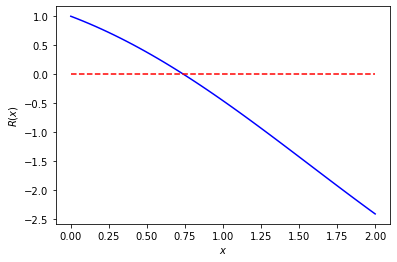

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
x = np.linspace(0,2)
plt.figure(1)
plt.plot(x,np.cos(x) - x,'b')
plt.plot(x,x*0,'r--')
plt.xlabel("$x$")
plt.ylabel("$R(x)$")

In [2]:
import scipy.optimize as opt
opt.fsolve?

[0.73908513]
Residual at initial guess: -4.653643620863612
Residual at final solution:  6.661338147750939e-16


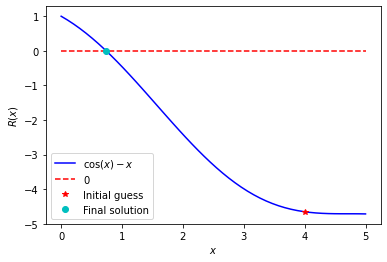

In [4]:
import scipy.optimize as opt
import matplotlib.pyplot as plt

x0 = 4

def f(x):
    return np.cos(x) - x
# def f(x):
#     return np.sin(x)

xf = opt.fsolve(f, x0)
print(xf)
x = np.linspace(0,5)
plt.figure(1)
plt.plot(x,f(x),'b',label="$\cos(x) - x$")
plt.plot(x,x*0,'r--',label="0")
plt.plot(x0,f(x0),'r*',label="Initial guess")
plt.plot(xf,f(xf),'co',label="Final solution")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$R(x)$")

print("Residual at initial guess:",f(x0))
print("Residual at final solution: ",f(xf[0]))

### Example:

Find the location where the two functions
$$
g(x) = \sin(x^2) \cdot \sin(x^2)
$$
$$
h(x) = e^{x}
$$
intersect.




In [ ]:

import scipy.optimize as opt
import matplotlib.pyplot as plt

x0 = 0.3

def R(x):
    x = np.array(x)
    return np.sin(x**2) * np.sin(x**2) - np.exp(x)

xf = opt.fsolve(R, x0)

x = np.linspace(-1,1)
plt.figure(1)
plt.plot(x,R(x),'b',label="$g(x) - h(x)$")
plt.plot(x,x*0,'r--',label="0")
plt.plot(x0,R(x0),'r*',label="Initial")
plt.plot(xf,R(xf),'co',label="Final")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$R(x)$")

print("Initial:",R(x0))
print("Residual: ",R(xf[0]))


## Exercise

Find the roots for the following polynomial using fsolve:

$$
(x - 3)(x - 2)(x+1)
$$

## Non-linear Equations*
- We cannot write a system of non-linear equations into a similar form as with a system of linear equations $\mathbf{A}\mathbf{x}=\mathbf{b}$!

- We therefore write it into residual form:
    $$
    \mathbf{R}(\mathbf{x}) = \begin{bmatrix}
            R_0(\mathbf{x})\\
            R_1(\mathbf{x})\\
            \vdots\\
            R_n(\mathbf{x})\\
        \end{bmatrix}
     = 
     \begin{bmatrix}
            0\\
            0\\
            \vdots\\
            0\\
     \end{bmatrix} = \mathbf{0}
    $$

- For example:
    $$
    \mathbf{R}(\mathbf{x}) = \begin{bmatrix}
            0.8\cos(\frac{\pi}{4}) + 2\cos(x_0) - 2\cos(x_1) - 3\\
            0.8\sin(\frac{\pi}{4}) + 2\sin(x_0) - 2\sin(x_1)\\
    \end{bmatrix} = 
    \begin{bmatrix}
            0\\
            0\\
    \end{bmatrix}
    $$

- Need to define a function for the residual $\mathbf{R}({x})$.


- Function takes array (unknown variables) as input and returns an array (result of each equation).


- `from scipy.optimize import fsolve`
    - First argument: **Function** that defines the residual.
    - Second argument: initial guess.

In [ ]:
import numpy as np
import scipy.optimize as opt

def residual(x):
    r1 = 0.8*np.cos(np.pi/4) + 2*np.cos(x[0]) - 2*np.cos(x[1]) - 3
    r2 = 0.8*np.sin(np.pi/4) + 2*np.sin(x[0]) - 2*np.sin(x[1])
    return r1, r2


x0 = np.array([0, 0])
ans = opt.fsolve(residual, x0)
print(ans)
print(residual(ans))

In [ ]:
%load_ext nbtutor

In [ ]:
%%nbtutor -r -f --depth 3
def twister():
    print("Red Lorry, Yellow Lorry")

def repeat(func, N):
    for i in range(N):
        func()

repeat(twister, 5)

### Example - Kinematics (Four-bar linkage)*

- Four-bar linkage (kinematics) with $L_1$, $L_2$, $L_3$ and $L_4$ the length of the links.


- Link 1 is fixed in a horizontal position.


- The link lengths are $L_1=3$, $L_2=0.8$, $L_3=2$ and $L_4=2$.

<img src="./figures/fourbar.svg" alt="Four Bar Linkage" style="height: 300px;"/>

- For a given $\theta_1$, we can solve for $\theta_2$ and $\theta_3$ using the following two non-linear equations:
    $$
    \begin{array}{l}
        L_2\cos(\theta_1) + L_3\cos(\theta_2) + L_4\cos(\theta_3) - L_1 = 0 \\
        L_2\sin(\theta_1) + L_3\sin(\theta_2) - L_4\sin(\theta_3) = 0 \\
    \end{array}
    $$

- Solve for $\theta_2$ and $\theta_3$ for $\theta_1=\pi/4$


- As a guess to the solution of the non-linear system use $[0.707; 0.707]$.


- Plot the three links for the solved values of $\theta_1$ and $\theta_2$.


- The coordinates of link three are given by
    $$
    \begin{align}
        x_1 &= L_2\cos(\theta_1) \\
        y_1 &= L_2\sin(\theta_1) \\
        x_2 &= L_2\cos(\theta_1) + L_3\cos(\theta_2) \\
        y_2 &= L_2\sin(\theta_1) + L_3\sin(\theta_2)
    \end{align}
    $$

In [ ]:
from numpy import pi, cos, sin
import matplotlib.pyplot as plt

def fourbar(theta23):
    L = [3.0, 0.8, 2.0, 2.0]
    theta = [pi/4, theta23[0], theta23[1]]
    R = [
        L[1]*cos(theta[0]) + L[2]*cos(theta[1]) + L[3]*cos(theta[2]) - L[0],
        L[1]*sin(theta[0]) + L[2]*sin(theta[1]) - L[3]*sin(theta[2])
    ]
    return R


def plot_links(theta23):
    L = [3.0, 0.8, 2.0, 2.0]
    theta = [pi/4, theta23[0], theta23[1]]
    plt.plot(
        [0, L[1]*cos(theta[0]), L[1]*cos(theta[0]) + L[2]*cos(theta[1]), L[0], 0],
        [0, L[1]*sin(theta[0]), L[1]*sin(theta[0]) + L[2]*sin(theta[1]),    0, 0],
        'k-'
    )

In [ ]:
%matplotlib inline
import scipy.optimize as opt
import matplotlib.pyplot as plt

x0 = [0.707, 0.707]

theta23 = opt.fsolve(fourbar, x0)

plot_links(theta23)
plt.show()

- Works but every time we change a length or $\theta_1$ we need to change it multiple places (2 cells)

- Improve by defining additional arguments.
    - Modify the function to take additional arguments that are known parameters of the problem e.g. $\theta_1$ and lengths.
    - `fsolve` pass a third argument of additional parameters.
    - Define additional parameters in $()$ as third argument e.g. `(theta1,lengths)`.
    - Order of additional parameters define the order of the parameters in the tuple argument.
    - Additional arguments are available for many `scipy` functions.
    - `fsolve(func, x0, args=(),...)`
        - `args`: tuple $\to$ Any extra arguments to `func`.
    - Python mechanism to pass known information (parameters) to a function that is given as an arguments for another function.

In [ ]:
from numpy import pi, cos, sin
import matplotlib.pyplot as plt

def fourbar(theta23, L, theta1):
    theta = [theta1, theta23[0], theta23[1]]
    R = [
        L[1]*cos(theta[0]) + L[2]*cos(theta[1]) + L[3]*cos(theta[2]) - L[0],
        L[1]*sin(theta[0]) + L[2]*sin(theta[1]) - L[3]*sin(theta[2])
    ]
    return R


def plot_links(theta23, L, theta1):
    theta = [theta1, theta23[0], theta23[1]]
    plt.plot(
        [0, L[1]*cos(theta[0]), L[1]*cos(theta[0]) + L[2]*cos(theta[1]), L[0], 0],
        [0, L[1]*sin(theta[0]), L[1]*sin(theta[0]) + L[2]*sin(theta[1]),    0, 0],
        'k-'
    )

In [ ]:
%matplotlib inline
import scipy.optimize as opt
import matplotlib.pyplot as plt

theta1 = pi/4
x0 = [0.707, 0.707]
L = [3.0, 0.8, 2.0, 2.0]

theta23 = opt.fsolve(fourbar, x0, args=(L, theta1))

plot_links(theta23, L, theta1)
plt.show()

- Solve for $\theta_2$ and $\theta_3$ for $\theta_1$ between 0 and $\pi$ using 10 linearly spaced intervals.

- Plot then link three for the various solved values of $\theta_1$ and $\theta_2$.

In [ ]:
%matplotlib inline
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

x0 = [0.707, 0.707]
L = [3.0, 0.8, 2.0, 2.0]
angles = np.linspace(0, np.pi, 10)

for theta1 in angles:
    theta23 = opt.fsolve(fourbar, x0, args=(L, theta1))
    plot_links(theta23, L, theta1)

plt.show()

## Integration - Single

### Example - Simple Integral

- Compute the following definite integral in python:
    $$
    \int^{9}_{2} 4x^2 + 5 \: \mathrm{dx} =
    \left. \left(\frac{4}{3} x^3 + 5x\right) \right|_2^9 =
    996.33
    $$

### Outcomes:
-   Importing and using quad $\to$ `from scipy import integrate` $\to$ `integrate.quad`


-   Passing a function as an input to another function


-   Integrate a function from a to b


-   Understanding the output from the `quad` function

In [ ]:
import numpy as np
import scipy.integrate as it

def equation(x):
    return 4*x**2 + 5

ans, err = it.quad(equation, 2, 9)
print(ans)
print(err)

In [1]:
import scipy.integrate as it
it.quad?

### Example - Single Integral

- Compute the following integral in python:
    $$\int^{b}_{a} C e^{-x} \: dx$$

- First for $a = 2$, $b = 5$ and $C = 12$

- Then for $a = 2$, $b = \infty$ and $C = 22$

### Outcomes:

-   Passing a function as an input to another function


-   Integrate a function from a to b


-   Integrate a function with an infinite interval


-   Creating an input function that has `args`

In [ ]:
import numpy as np
import scipy.integrate as it

def equation(x, C):
    return C * np.exp(-x)

a = 2
b1 = 5
c1 = 12
ans1, err1 = it.quad(equation,a,b1,c1)
print("a:{}, b:{}, C:{}, ans:{}, err:{}".format(a,b1,c1,ans1,err1))

b2 = np.inf
c2 = 22
ans2, err2 = it.quad(equation,a,b2,c2)
print("\na:{}, b:{}, C:{}, ans:{}, err:{}".format(a,b2,c2,ans2,err2))


print('\n------------------------')
for c in [12, 90, 22, -12, 9, 24]:
    ans, err = it.quad(
        equation, 0, np.inf,
        args = c
    )
    print(ans)

## Integration - Double*

### Example - Double Integral

- Compute the following integral in python:
    $$\iint_D x y^2 \: \mathrm{dA}$$


- Where $D$ is the rectangular region defined by $0 \leq x \leq 2$ and $0 \leq y \leq 1$:

<img src="./figures/double_integral_over_rectangle.png" alt="Double Integral Rectangle" style="height: 200px;"/>

$$
\begin{aligned}
    \int_0^1 \left( \int_0^2 xy^2 \mathrm{dx}\right) \mathrm{dy} =
    \int_0^1 \left(\left. \frac{x^2}{2} y^2 \right|_{x=0}^{x=2} \right) \mathrm{dy} =
    \int_0^1 2 y^2 \mathrm{dy} =
    \left. \frac{2 y^3}{3} \right|_{y=0}^{y=1} =
    2/3
\end{aligned}
$$

### Outcomes

- Importing and using quad $\to$ `from scipy import integrate` $\to$ `integrate.dblquad`


- Passing multiple functions as inputs to another function


- Integrate a function for $x \in [a, b]$ and $y \in [c, d]$


- Understanding the output from the `dblquad` function


- Why must the inner integral limits $\left( \int^{2}_{x=0} \right)$ be given as functions?

In [1]:
from scipy import integrate as it

def equation(y, x):
    return x * y**2

def inner_bound_lower(x):
    return 0

def inner_bound_upper(x):
    return x/2

ans, err = it.dblquad(
    equation, 0, 2,
    inner_bound_lower,
    inner_bound_upper
)
print(ans)
print(err)
print(32/120)

0.2666666666666667
7.337409017185647e-15
0.26666666666666666


### Example - Double Integral  (x First)*

- Compute the following integral in python:
    $$\iint_D x y^2 \: \mathrm{dA}$$


- Where $D$ is the triangular region defined by $0 \leq x \leq 2$ and $0 \leq y \leq x/2$:

<img src="./figures/double_integral_over_triangle_x_first.png" alt="Double Integral Triangle" style="height: 200px;"/>

$$
\begin{aligned}
    \int_0^2 \left(\int_0^{x/2} xy^2 \mathrm{dy} \right) \mathrm{dx} =
    \int_0^2 \left(\left.\frac{x}{3} y^3 \right|_{y=0}^{y=x/2}\right) \mathrm{dx} =
    \int_0^2 \frac{x^4}{24} \mathrm{dx} =
    \left. \frac{x^5}{120} \right|_{x=0}^{x=2} =
    32/120
\end{aligned}
$$

### Outcomes

- Passing multiple functions as inputs to another function


- Integrate a function for $x \in [a, b]$ and $y \in [c, d]$, where $c$ or $d$ is a function of $x$


- Understanding the output from the `dblquad` function

In [ ]:
from scipy import integrate as it

def function(y, x): 
    return x * y**2

def inner_bound_lower(x): 
    return 0

def inner_bound_upper(x): 
    return x / 2.0

ans, err = it.dblquad(
    function, 0, 2,
    inner_bound_lower,
    inner_bound_upper
)

print(ans)
print(err)
print(32/120)

### Example - Double Integral  (y First)*

- Compute the following integral in python:
    $$\iint_D x y^2 \: \mathrm{dA}$$


- Where $D$ is the triangular region defined by $0 \leq x \leq 2$ and $0 \leq y \leq x/2$:

<img src="./figures/double_integral_over_triangle_y_first.png" alt="Double Integral Triangle" style="height: 200px;"/>

$$\begin{aligned}
    \int_0^1 \left( \int_{2y}^2 xy^2 \mathrm{dx} \right) \mathrm{dy} =
    \int_0^1\left(\left.\frac{x^2y^2}{2} \right|_{x=2y}^{x=2}\right) \mathrm{dy} =
    \int_0^1 \left( 2y^2 - 2y^4\right) \mathrm{dy} =
    \left. \left(\frac{2y^3}{3} - \frac{2y^5}{5}\right) \right|_{y=0}^{y=1} = 
    2/3 - 2/5 = 4/15
\end{aligned}
$$


### Outcomes

- Passing multiple functions as inputs to another function


- Integrate a function for $x \in [a, b]$ and $y \in [c, d]$, where $c$ or $d$ is a function of $x$


- Understanding the output from the `dblquad` function

In [ ]:
def function(x, y):
    return x * y**2

def inner_bound_lower(y): 
    return 2*y

def inner_bound_upper(y): 
    return 2

In [ ]:
from scipy import integrate

ans, error = integrate.dblquad(
    function, 0, 1,
    inner_bound_lower,
    inner_bound_upper
)
print(ans)
print(error)

## Optimisation*

### Example - Tin Can

- A cylindrical-shaped tin-can must have a capacity of $1000cm^3$.


- Determine the dimensions that require the minimum amount of tin for the can (assume no waste material)


- The smallest can that the market will accept has a diameter of $6cm$ and a height of $4cm$


- Variables:
    $$x = [x_1, x_2] = [r, h]$$


- Surface Area (Objective Function):
    $$A(x) = 2 \pi \left({x_1}^2 + {x_1} {x_2} \right)$$


- Constraints (Inequality):
    $$\begin{align}
    g_1(x) &= \pi {x_1}^2 x_2 - 1000 \geq 0 \\
    g_2(x) &= x_1 - 3 \geq 0 \\
    g_3(x) &= x_2 - 4 \geq 0 
    \end{align} $$

### Outcomes

- Importing and using `fmin_slsqp` $\to$ `from scipy.optimize import fmin_slsqp`


- Creating the objective function and constraint functions


- Passing multiple functions as inputs to another function


- Understanding the output from the `fmin_slsqp` function


- Non-linear optimisation problem


- Need to write $g(x)$ in the form $g(x) >= 0$

In [ ]:
import numpy as np

def function(x): 
    return np.pi * (x[0]**2 + x[0]*x[1])


def ineq_constraints(x): 
    return [
        np.pi * (x[0]**2) * x[1]- 1000,
        x[0] - 3, 
        x[1] - 4
    ]

In [ ]:
from scipy import optimize

x = optimize.fmin_slsqp(
    function,
    [1, 1],
    f_ieqcons=ineq_constraints
)

print(x)

## Solve ODE

### Example - Newton's law of cooling

Newton's law of cooling of a body with temperature $T$ is:
$$
\frac{dT}{dt} = k (A - T)
$$
where $A$ is the ambient temperature, $k$ is a constant and $t$ is time. 

**Analytical solution**

The analytical solution is as follows:
$$
T(t) = A + (T_{0} - A) e^{-k\cdot t}
$$
where $T_{0}$ is the initial temperature of the body and $T(t)$ is a temperature over time.

**Example:**

Consider the following case:

- $T_{0}$ = 100

- $k$ = 1

- $A$ = 70

Use `odeint` to solve the differential equation and compare it against the analytical solution. 


In [ ]:
from scipy.integrate import odeint
odeint?

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

def func(T,t,k,A):
    dTdt = k * (A - T)
    return dTdt

k,A = 1,70

T_initial = 100  
times = np.linspace(0, 5, 200)
results = odeint(func, [T_initial], times,args=(k,A))

def analytical(t,k,T_initial,A):
    T = A + (T_initial - A)*np.exp(-k * t)
    return T

plt.figure(1)
plt.plot(times, results[:, 0], 'b')
plt.plot(times,analytical(times,k,T_initial,A),'r:')
plt.xlabel('time')
plt.ylabel("T")
plt.show()

### Example - Spring, mass and damper system*

<img src="./figures/springdamper.svg" alt="Spring Damper" style="height: 220px;"/>

- The position of the mass $m$ is given by $x$


- There is some force $f(t)$ applied to the mass that can vary with time


- $x$ is a function of time $t$ therefore $x(t)$


- Determine the position $x(t)$ of the mass $m$ for various values of $t$

### Outcomes

- Understanding and using the `odeint` function


- Understanding `tuple` unpacking

### Mathematics

- Spring force:

$$F_s(t) = -kx(t)$$


- Damping force:
$$F_d(t) = -cv(t) = -c\dot{x}(t)$$


- Force balance (Newtons law)
$$F = m a$$

$$F_s(t) + F_d(t) + f(t) = ma(t)$$

$$-k x(t) - c v(t) + f(t) = ma(t)$$

$$f(t) = k x(t) + c v(t) + ma(t)$$


- Note that
    - $v(t) = \dot x(t)$
    - $a(t) = \dot v(t) = \ddot x(t)$

$$f(t) = k x(t) + c \dot x(t) + m \ddot x(t)$$


- second order differential equation !! How do we solve this?

- Need to write this second order DE as two first order DE's and solve simultaneously
    - Fist equation:
        $$v(t) = \dot x(t)$$
    - Second equation:
        $$f(t) = k x(t) + c v(t) + m \dot v(t)$$


- Re-arranging for the first time derivatives:
    - Fist equation:
        $$\dot x(t) = v(t)$$
    - Second equation:
        $$\dot v(t) = \frac{f(t)}{m} - \frac{k x(t)}{m} - \frac{c v(t)}{m} $$

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint


def force(t):
    return 0


def func(variables, t, c, k, m):
    xt, vt = variables
    ft = force(t)
    return [
        vt,
        ft/m - k*xt/m - c*vt/m
    ]


x_init = 10  # initial position
v_init = 0  # initial velocity

times = np.linspace(1, 100, 200)
results = odeint(func, [x_init, v_init], times, args=(0.2, 1, 1))

plt.plot(times, results[:, 0], 'r')
plt.plot(times, results[:, 1], 'b')
plt.legend(['position', 'velocity'])
plt.xlabel('time')
plt.show()